# Introducción a Python orientado a Ciencias e ingenierías: <br/> Interpolación y ajuste de curvas (fiteo)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('presentation')
fsize= (9,6)

## Interpolación

Muchas veces tenemos datos medidos variando algún parámetro en las condiciones, y estos datos están medidos a intervalos mayores de los que deseamos. En estos casos es común tratar de inferir los valores que tendrían las mediciones para valores intermedios de nuestro parámetro. Una opción es interpolar los datos. Algunas facilidades para ello están en el subpaquete **interpolate** del paquete **Scipy**. Generemos algunos "datos experimentales"

In [2]:
def fmodel(x):
  return (np.sin(x))**2*np.exp(-(x/3.5)**2)

In [3]:
x0 = np.linspace(0., 2*np.pi, 60)
y0 = fmodel(x0)
x = np.linspace(0., 2*np.pi, 8)
y = fmodel(x)

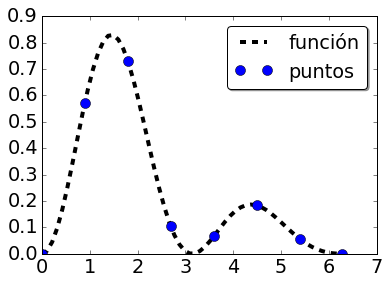

In [4]:
plt.plot(x0,y0,'--k', label='función')
plt.plot(x,y,'ob', label='puntos')
plt.legend(loc='best')

Acá hemos simulado datos con una función oscilante con un decaimiento exponencial.  Ahora, importamos el módulo adecuado para interpolar

In [5]:
from scipy import interpolate

La interpolación funciona en dos pasos. En la primera realizamos todos los cálculos y obtenemos la función interpolante, y en la segunda utilizamos esa función interpolar en los puntos sobre el eje x que necesitamos

In [6]:
interpol_lineal = interpolate.interp1d(x, y)

In [7]:
x1 = np.linspace(0, 2*np.pi, 33)
y1_l= interpol_lineal(x1)

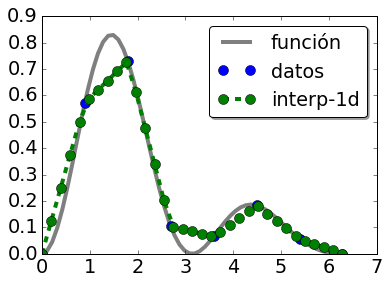

In [9]:
plt.plot(x0,y0, '-k', label='función', alpha=0.5)
plt.plot(x, y,'ob', label='datos')
plt.plot(x1, y1_l,'--og', label='interp-1d')
plt.legend(loc='best')

Para realizar interpolaciones lineales (una recta entre pares de puntos) también se puede utilizar la rutina `interp()` del módulo **Numpy**, cuyos argumentos requeridos son: los puntos `x1` donde queremos interpolar, los valores de `x` y los valores de `y` de la tabla a interpolar:

In [10]:
y1_n= np.interp(x1,x,y)

In [11]:
np.all(y1_n == y1_l)

True

Cuando creamos la función con `interp1d` podemos aplicarla a diferentes conjuntos de valores de x:

In [12]:
y2_l = interpol_lineal(x1)

La interface `interp1d()` tiene un argumento opcional, `kind`, que define el tipo de interpolación a utilizar. Cuando utilizamos el argumento 'nearest' utiliza para cada valor el más cercano

In [13]:
interpol_near = interpolate.interp1d(x, y, kind='nearest')
y1_n = interpol_near(x1)

33 33 8


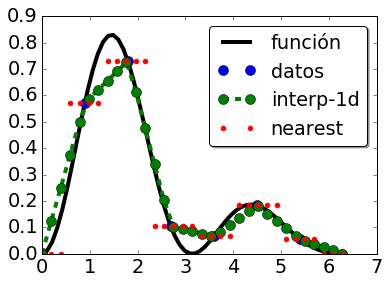

In [16]:
plt.plot(x0,y0, '-k', label='función')
plt.plot(x, y,'ob', label='datos')
plt.plot(x1, y1_l,'--og', label='interp-1d')
plt.plot(x1, y1_n,'.r', label='nearest')
plt.legend(loc='best');
print(x1.size, x1.size, x.size)

### Interpolación con polinomios

**Scipy** tiene rutinas para interpolar con un polinomio todos los datos

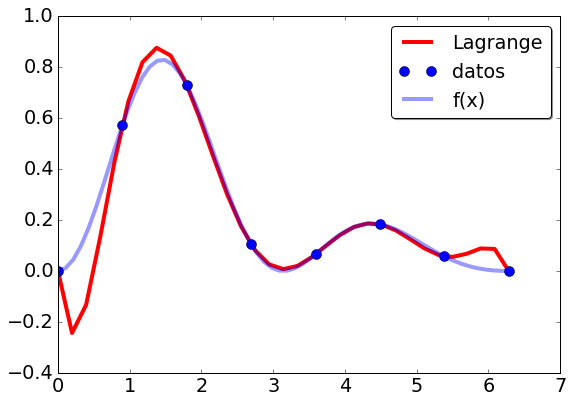

In [17]:
f = interpolate.lagrange(x, y)
y2 = f(x1)
plt.figure(figsize=fsize)
plt.plot(x1,y2,'r-', label='Lagrange')
plt.plot(x,y,'ob', label='datos')
plt.plot(x0,y0,'-b', label='f(x)', alpha=0.4)
plt.legend(loc='best')

Los polinomios interpolantes pueden tener problemas, principalmente en las puntas, o cuando el grado del polinomio es muy alto:

Número de datos: 33


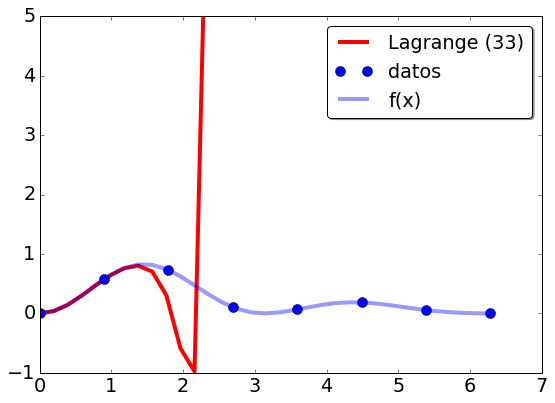

In [18]:
plt.figure(figsize=fsize)
f1 = interpolate.lagrange(x1, fmodel(x1))
plt.plot(x1,f1(x1),'r-', label='Lagrange ({})'.format(x1.size))
plt.plot(x,y,'ob', label='datos')
plt.plot(x1,fmodel(x1),'-b', label='f(x)', alpha=0.4)
plt.ylim((-1,5))
plt.legend(loc='best')
print('Número de datos:', x1.size)

De todas maneras, en los casos en que es aplicable, existen dos implementaciones: `interpolate.lagrange()` y una segunda llamada `interpolate.barycentric_interpolate()` que está basada en un trabajo de 2004 y es numéricamente más estable. Suele ser más 

### Splines

-  Las *Splines* son interpolaciones por polinomios de a trazos, que se eligen para que no sólo los valores sino también sus derivadas coincidan dando una curva suave.
-  Para eso se pide que los puntos en que coinciden sean los dados. De esta manera es efectivamente una **interpolación**.
-  Cubic Splines se refiere a que utilizamos polinomios cúbicos en cada trozo

El argumento opcional `kind` de la interface `interp1d()`, que define el tipo de interpolación a utilizar, acepta valores del tipo *string* que pueden ser: 'linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', o un número entero indicando el orden.

In [19]:
interp = {}
for k in ['zero', 'slinear', 'quadratic', 'cubic']:
  interp[k] = interpolate.interp1d(x,y, kind=k)

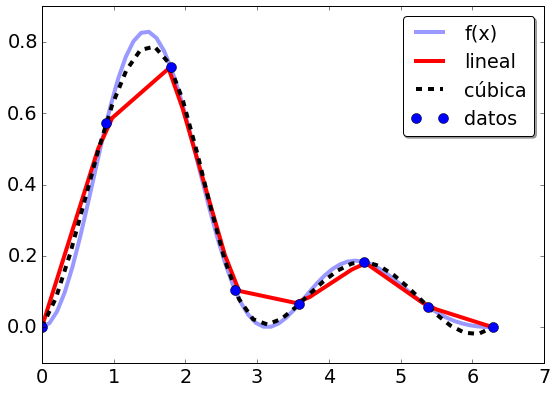

In [20]:
fig= plt.figure(figsize=fsize)
plt.plot(x0,y0,'-b', alpha=0.4, label='f(x)')
plt.plot(x1,interp['slinear'](x1),'-r', label='lineal')
plt.plot(x1,interp['cubic'](x1),  '--k', label=u'cúbica')
plt.plot(x,y,'ob', label='datos')
plt.legend(loc='best')

Tratamos de meter todo en un sólo gráfico (y rogamos que se entienda algo) 

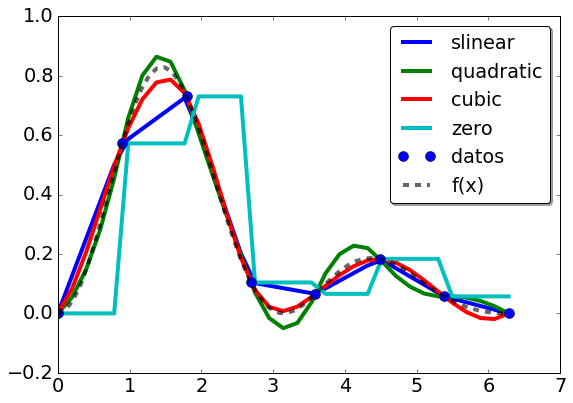

In [21]:
plt.figure(figsize=fsize)
for k, v in interp.items():
  plt.plot(x1, v(x1), label=k)
plt.plot(x,y,'ob', label='datos')
plt.plot(x0,y0,'--k', alpha=0.6, label='f(x)')
plt.legend(loc='best')

Además de los argumentos `slinear`, `quadratic`, `cubic` para especificar splines de primer, segundo y tercer orden se puede pasar como argumento un número que especifica el orden de las splines a utilizar

In [27]:
for k in range(0,7):
  interp[k] = interpolate.interp1d(x,y,kind=k)

In [23]:
for k,s in zip([1,2,3], ['slinear','quadratic','cubic']):
  print(np.allclose(interp[k](x1), interp[s](x1)))

True
True
True


In [24]:
np.allclose(interp[1](x1), interpol_lineal(x1)) # También son iguales

True

In [ ]:
np.source(interpolate.interp1d)

De todas maneras, hay que tener en cuenta que con pocos datos no es buena idea utilizar un polinomio de un orden tan alto:

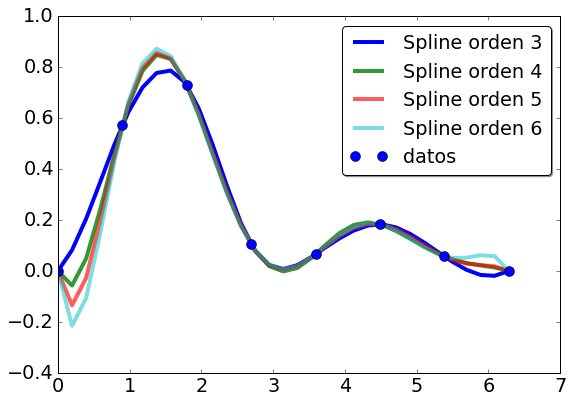

In [29]:
plt.figure(figsize=fsize)
alfa=1
for k in range(3,7):
  plt.plot(x1, interp[k](x1), label='Spline orden {}'.format(k), alpha=alfa)
  alfa *= 0.8
plt.plot(x,y,'ob', label='datos')
plt.legend(loc='best')

El submódulo `signal` tiene rutinas adicionales para realizar *splines*, que permiten agregar un "alisado", pero en este caso ya no interpolan estrictamente sino que puede ser que la aproximación no pase por los puntos dados.

### B-Splines

Hay otra opción para realizar interpolación con Splines en Scipy. Las llamadas **B-Splines** son funciones diseñadas para generalizar polinomios. Están definidas mediante

\begin{align}\begin{aligned}B_{i, 0}(x) &= 1,\qquad \qquad \textrm{si $t_i \le x < t_{i+1}$, sino $0$,}\\
B_{i, k}(x) &= \frac{x - t_i}{t_{i+k} - t_i} B_{i, k-1}(x)
         + \frac{t_{i+k+1} - x}{t_{i+k+1} - t_{i+1}} B_{i+1, k-1}(x)\end{aligned}\end{align}

Estas funciones son diferentes de cero sólo en un intervalo. En ese intervalo presentan un único máximo y luego decaen suavemente. 

![](figuras/bsplines.png)

(Figura de http://www.brnt.eu/phd)

Veamos cómo usarlas:

In [30]:
x2 = np.linspace(0, 2*np.pi, 60)

In [31]:
tck0 = interpolate.splrep(x,y, s=0)
y_s0 = interpolate.splev(x2, tck0)

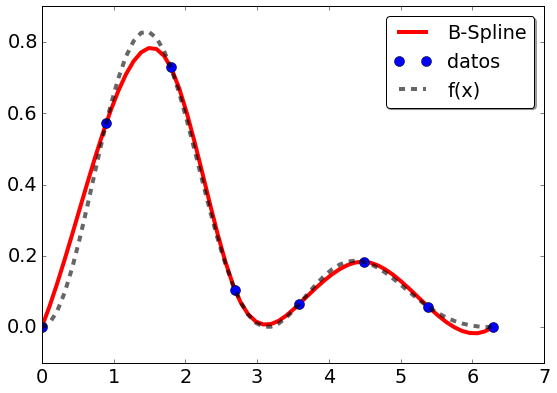

In [33]:
plt.figure(figsize=fsize)
plt.plot(x2,y_s0,'-r', label=r'B-Spline')
#plt.plot(x1,interp['cubic'](x1),  '--k', label=u'cúbica')
plt.plot(x,y,'ob', label='datos')
plt.plot(x0,y0,'--k', alpha=0.6, label='f(x)')
plt.legend(loc='best');

### Lines are guides to the eyes

Sin embargo, estas rutinas no necesariamente realizan *interpolación* en forma estricta, pasando por todos los puntos dados, sino que pueden realizar un fiteo por cuadrados mínimos. Muchas veces tenemos datos que tienen mucha dispersión. En esos casos en que necesitamos curvas que *no necesariamente* pasen por todos los puntos

La rutina `splrep` tiene otros argumentos opcionales. Entre ellos un parámetro de suavizado `s`. Veamos más o menos como funciona

In [34]:
x3 = np.linspace(0., 2*np.pi, 40)
y3 = 0.5* np.sin(x3) * (1+ 0.6*(0.5-np.random.random(x3.size)))

In [35]:
tck0 = interpolate.splrep(x3,y3, s=0)
y_s0 = interpolate.splev(x1,tck0)
tck1 = interpolate.splrep(x3,y3,s=0.5)
y_s1 = interpolate.splev(x1,tck1)



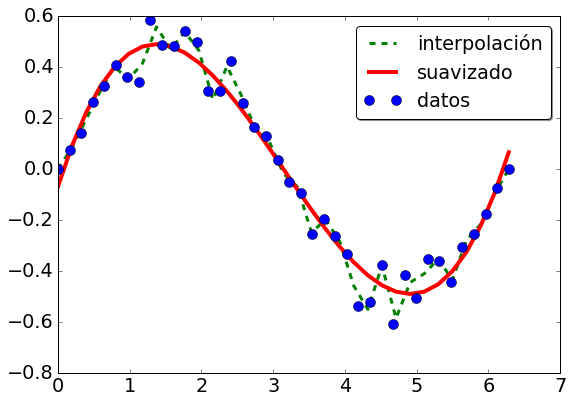

In [36]:
plt.figure(figsize=fsize)
plt.plot(x1,y_s0,'--g', lw=3, label=u'interpolación' )
plt.plot(x1,y_s1, "-r",  label=u'suavizado');
plt.plot(x3,y3,'ob', label='datos' )
#plt.plot(x3,fmodel(x3),'.-k', alpha=0.5, label='f(x)' )
plt.legend(loc='best');


### Cantidades derivadas de *splines*

De la interpolación (suavizada) podemos calcular, por ejemplo,  la derivada.

In [37]:
yder= interpolate.splev(x1,tck1,der=1) #  Derivada

Si tenemos sólo los datos podríamos tratar de calcular la derivada como el coseno
$$ y' = 0.5 \sqrt{1 - y^2} $$

In [38]:
cond = (x3 > np.pi/2) & (x3 < 3*np.pi/2)
yprima1= np.where(cond, -1, 1)* 0.5*np.sqrt(np.abs(1 - y3**2))
# yprima2= np.where(cond, -0.5*np.cos(np.abs(np.arcsin(y3))), 0.5*np.cos(np.abs(np.arcsin(y3))))

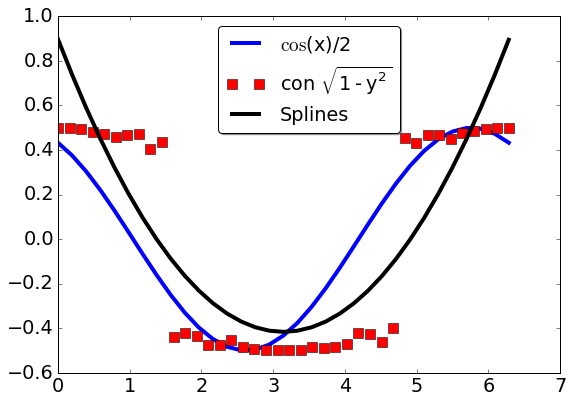

In [39]:
plt.figure(figsize=fsize)
plt.plot(x1,0.5*np.cos(x1+np.pi/6),label=r"$\cos(x)/2$")
plt.plot(x3, yprima1,"sr", label=r"con $\sqrt{1-y^2}$")
# plt.plot(x3, yprima2,"sg", ms=4, label=r"from arcsin")
plt.plot(x1,yder,'-k', label=u'Splines')
plt.legend(loc='best');

o la integral, o las raíces

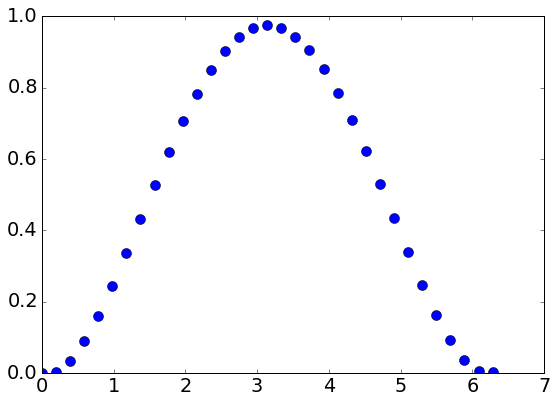

In [40]:
plt.figure(figsize=fsize)
yt= np.array([interpolate.splint(0,t,tck1) for t in x1])
plt.plot(x1,yt,'o');

In [41]:
print("La raíz está en {0} y {1} de pi".format(*(interpolate.sproot(tck1)/np.pi)))

La raíz está en 0.02525852813800942 y 1.0008335446065602 de pi


## Fiteos

### Ajuste con polinomios

Habitualmente realizamos ajustes sobre datos que tienen incertezas o ruido. Generemos estos datos (con ruido normalmente distribuido)

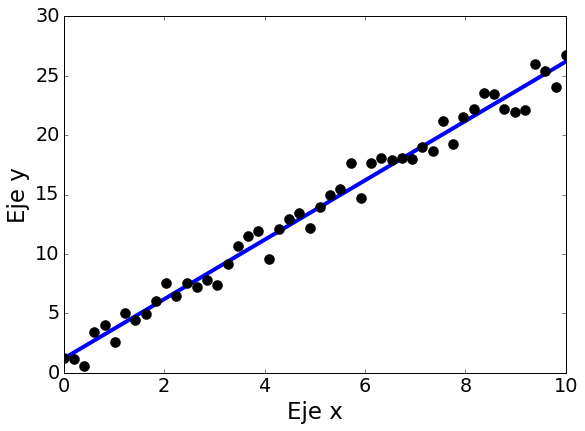

In [42]:
plt.figure(figsize=fsize)
x = np.linspace(0, 10, 50)
y0 = 2.5*x + 1.2
ruido = np.random.normal(loc= 0., scale= 1, size= y0.size)
y = y0 + ruido
plt.plot(x,y0,'-b')
plt.plot(x,y, 'ok')
plt.xlabel("Eje x")
plt.ylabel("Eje y");

Ahora vamos a ajustar con una recta

$$y = m x + b    \qquad \equiv \qquad    f(x) = p[0] x + p[1]$$

Es una regresión lineal (o una aproximación con polinomios de primer orden)


In [49]:
p = np.polyfit(x,y,1)
# np.info(np.polyfit) # para obtener más información

In [44]:
print(p)
print(type(p))                  # Qué tipo es?

[ 2.5013194   1.19010155]
<class 'numpy.ndarray'>


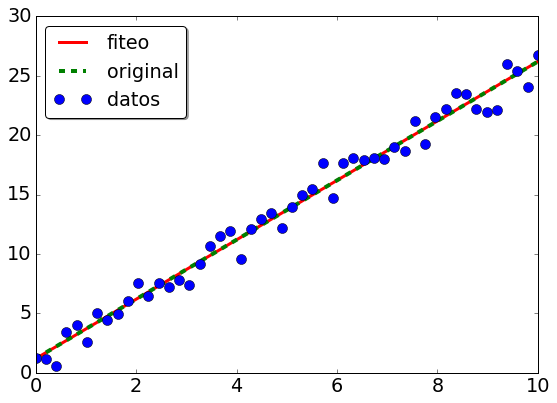

In [47]:
plt.figure(figsize=fsize)
plt.plot(x,p[0]*x+p[1],'r-',lw=3, label='fiteo')
plt.plot(x,y0,'--g', label='original')
plt.plot(x,y,'ob', label='datos')
plt.legend(loc='best');

Ahora en vez de escribir la recta explícitamente le pedimos a **numpy** que lo hagausando los coeficientes que encontramos mediante el fiteo (función *polyval*):

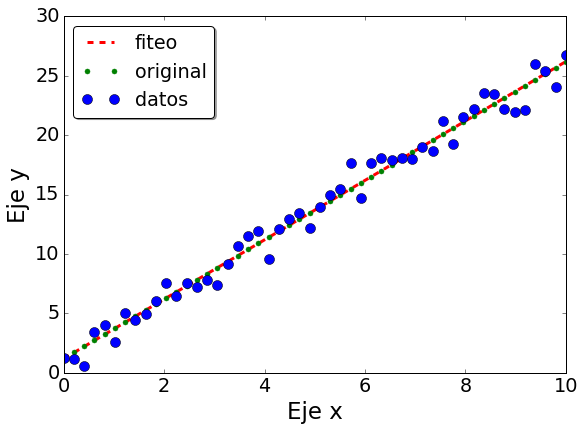

In [50]:
plt.figure(figsize=fsize)
plt.plot(x,np.polyval(p,x),'r--',lw=3, label='fiteo') 
plt.plot(x,y0,'.g',label='original')
plt.plot(x,y,'ob',label='datos') 
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.legend(loc='best');

Si los datos tienen mucho ruido...

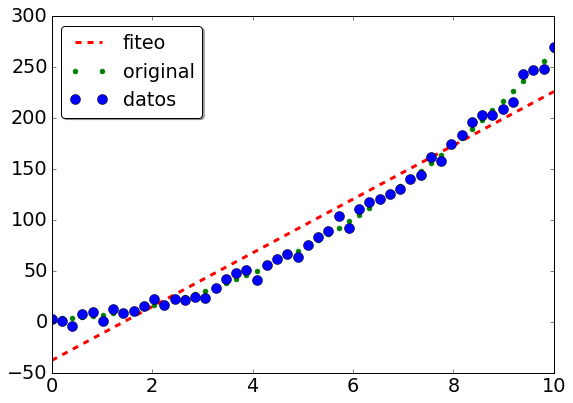

In [53]:

y= y0 + 5*ruido
p = np.polyfit(x, y , 1)
plt.figure(figsize=fsize)
plt.plot(x,np.polyval(p,x),'r--',lw=3, label='fiteo') 
plt.plot(x,y0,'.g',label='original')
plt.plot(x,y,'ob',label='datos')
plt.legend(loc='best');

Similarmente podemos usar polinomios de orden superior. Por ejemplo, con parábolas

In [54]:
a = [2.5, 1.4, 3.]
y0 = np.polyval(a,x)
y= y0 + 10*ruido
p = np.polyfit(x, y , 2)


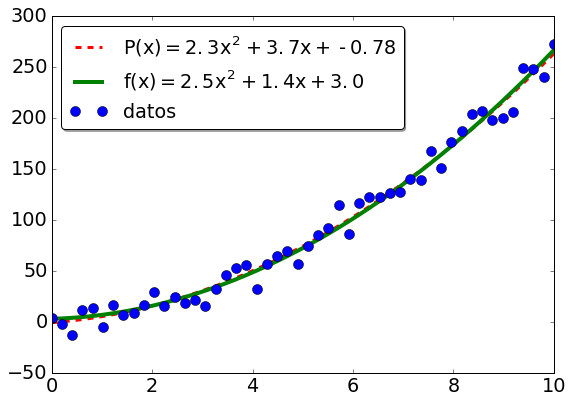

In [55]:
plt.figure(figsize=fsize)
plt.plot(x,np.polyval(p,x),'r--',lw=3, label="$P(x)={0:.2}x^2 + {1:.2} x + {2:.2}$".format(*p))
plt.plot(x,y0,'-g',label="$f(x)={0:.2}x^2 + {1:.2} x + {2:.2}$".format(*a)) 
plt.plot(x,y,'ob',label='datos')
plt.legend(loc='best');

## Fiteos con Scipy

Vamos ahora a fitear una función que no responde a la forma polinomial.
Una función complicaaaada 

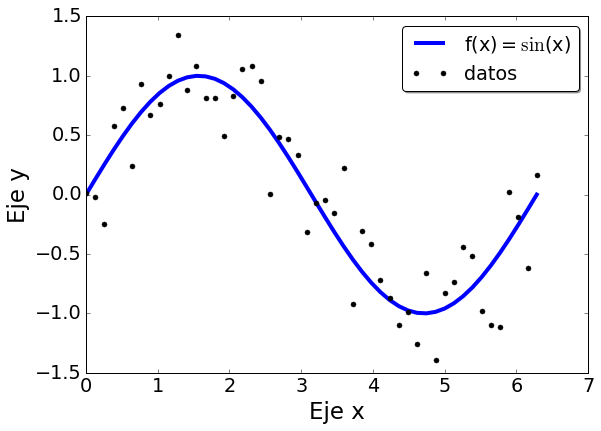

In [56]:
plt.figure(figsize=fsize)
x = np.linspace(0., 2*np.pi, 50)
y0= np.sin(x)
y = y0 + 0.3*ruido
plt.plot(x,y0,'-b',label="$f(x)=\sin(x)$") 
plt.plot(x,y,'.k',label='datos') # repeated from above
plt.xlabel("Eje x") # labels again
plt.ylabel("Eje y")
plt.legend(loc='best');

Para eso vamos a utilizar funciones del paquete Scipy

In [58]:
from scipy.optimize import curve_fit

In [59]:
# We need to know what it does:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        c

Veamos lo que devuelve:


    Returns
    -------
    popt : array
        Optimal values for the parameters so that the sum of the squared error
        of ``f(xdata, *popt) - ydata`` is minimized
    pcov : 2d array
        The estimated covariance of popt.  The diagonals provide the variance
        of the parameter estimate.
    

El primer *array* tiene los parámetros para "best-fit", y el segundo da la estimación del error: la matriz de covarianza

Ahora, definimos una función que vamos a ajustar. 

In [60]:
def fit_func_sin(x, a, b, c, d):
  y= a*np.sin(b*x-d)+c
  return y

Los valores están guardados en arrays `x` e `y`

In [61]:
initial_guess= None 
# [1., 1., 1., 0.2]
params, p_covarianza = curve_fit(fit_func_sin, x, y, initial_guess)
params

array([  9.74314219e-01,   9.85172060e-01,  -6.10198554e-04,
         2.78198199e-02])

(-1.5, 2.5)

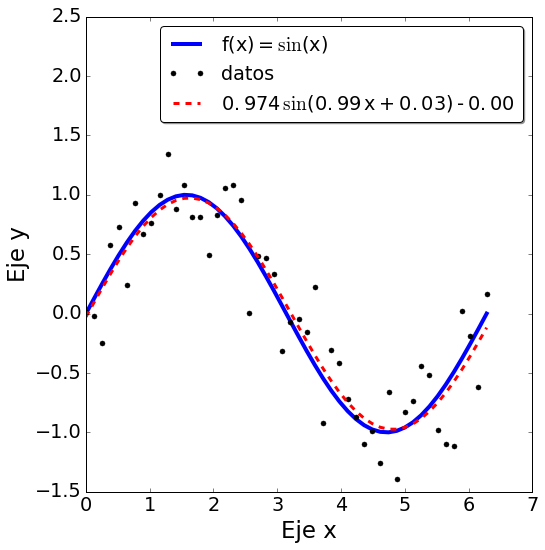

In [66]:
plt.figure(figsize=(8,8))
plt.plot(x,y0,'-b',label="$f(x)=\sin(x)$") 
plt.plot(x,y,'.k',label='datos') # repeated from above
label=r'${0:.3}\, \sin ({1:.2}\, x {3:+.2f}) {2:+.2f}$'.format(*params)
plt.plot(x,fit_func_sin(x, *params), '--r', label=label, lw=3)
plt.xlabel("Eje x") # labels again
plt.ylabel("Eje y")
plt.legend(loc='best');
plt.ylim((-1.5,2.5))

In [67]:
# Puntos "experimentales"
x = np.linspace(0., 2*np.pi, 5000)
y0= np.sin(x)
y = y0 + 0.3* np.random.normal(loc= 0., scale= 1, size= y0.size);
# Fiteo

In [68]:
initial_guess= [1., 1., 1., 0.2]
params, p_covarianza = curve_fit(fit_func_sin, x, y, initial_guess)

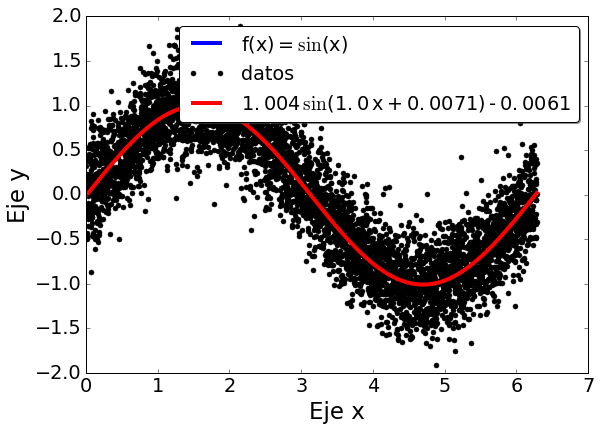

In [70]:
# Graficación
plt.figure(figsize=fsize)
plt.plot(x,y0,'-b',label="$f(x)=\sin(x)$") 
plt.plot(x,y,'.k',label='datos') # repeated from above
label=r'${0:.5}\, \sin ({1:.3}\, x {3:+.2})  {2:+.2}$'.format(*params)
plt.plot(x,fit_func_sin(x, *params), '-r', label=label)
plt.xlabel("Eje x") # labels again
plt.ylabel("Eje y")
plt.legend(loc='best');

In [71]:
np.diagonal(p_covarianza)

array([  3.84593661e-05,   9.90611635e-06,   1.79074264e-05,
         1.33597890e-04])

### Ejemplo: Fiteo de picos

Vamos a suponer que los datos son obtenidos mediante la repetición de mediciones

In [72]:
r = np.random.normal(size=1000)
y,x = np.histogram(r, bins=30, range=(-4,4), normed=True)
print('x.size={0}, y.size={1}'.format(x.size, y.size))
x = (x[1:]+x[:-1])/2
print('x.size={0}, y.size={1}'.format(x.size, y.size))

x.size=31, y.size=30
x.size=30, y.size=30


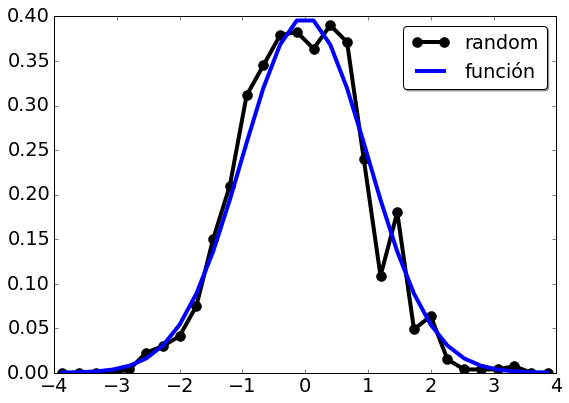

In [73]:
from scipy import stats
b = stats.norm.pdf(x)
plt.figure(figsize=fsize)
plt.plot(x,y,'o-k', label='random')
plt.plot(x,b,'-b', label=u'función')
plt.legend(loc='best');


In [74]:
npoints= 2000
r = np.r_[np.random.normal(size=npoints), np.random.normal(loc=2, scale=.6, size=npoints)]
y,x = np.histogram(r , bins = 40, range = (-3.5,4.5), normed=True)
x = (x[1:]+x[:-1])/2

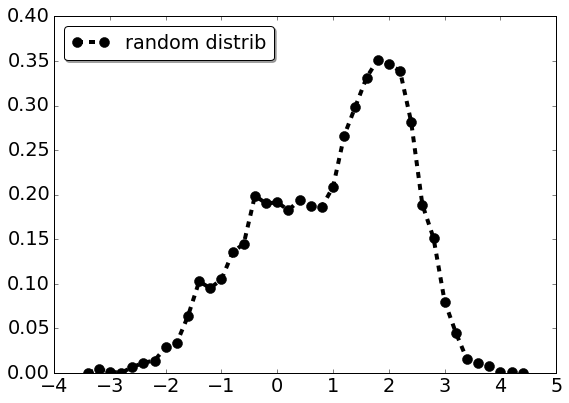

In [75]:
plt.figure(figsize=fsize)
plt.plot(x,y,'o--k', label='random distrib')
plt.legend(loc='best');


In [76]:
def modelo(x, *coeffs):
  "Suma de dos Gaussianas, con pesos dados por coeffs[0] y coeffs[3], respectivamente"
  return coeffs[0]*stats.norm.pdf(x,loc=coeffs[1], scale=coeffs[2]) + \
  coeffs[3]*stats.norm.pdf(x,loc=coeffs[4], scale=coeffs[5])

In [77]:
help(modelo)

Help on function modelo in module __main__:

modelo(x, *coeffs)
    Suma de dos Gaussianas, con pesos dados por coeffs[0] y coeffs[3], respectivamente



Es muy fácil realizar el fiteo. Mirando el gráfico proponemos valores iniciales

In [78]:
c0 = np.array([1., -0.5, 1., 1., 1.5, 1.])
c, cov = curve_fit(modelo, x, y, p0 = c0)
print(c)

[ 0.48211112 -0.02653047  1.02015379  0.52090336  1.95994735  0.62567908]


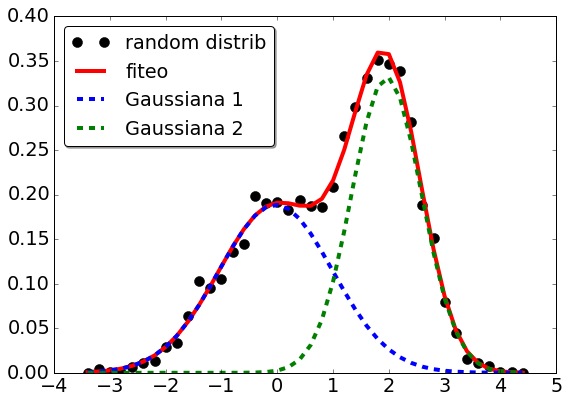

In [79]:
plt.figure(figsize=fsize)
plt.plot(x,y,'ok', label='random distrib')
plt.plot(x, modelo(x,*c), '-r', label='fiteo')
plt.plot(x,c[0]*stats.norm.pdf(x,loc=c[1], scale=c[2]), '--b', label='Gaussiana 1')
plt.plot(x,c[3]*stats.norm.pdf(x,loc=c[4], scale=c[5]), '--g', label='Gaussiana 2')
plt.legend( loc = 'best' );
